In [1]:
import pandas as pd
# load dataset
bank_data = pd.read_csv("C:/Users/fateme/Desktop/pythonassignmnt/bank-additional-full.csv", delimiter=";")

In [2]:
# Display the first few rows of the dataframe
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Check for missing values in the dataset
print(bank_data.isnull().sum()) 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [6]:
# check for data types
print(bank_data.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [7]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
random_seed = 42

# Split the data into 80% training and 20% test set, here we will use the test set as our sample
_, sample_df = train_test_split(bank_data, test_size=0.2, random_state=random_seed)

# Display the first few rows of the sampled data
sample_df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
32884,57,technician,married,high.school,no,no,yes,cellular,may,mon,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
3169,55,unknown,married,unknown,unknown,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
32206,33,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,...,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no
9403,36,admin.,married,high.school,no,no,no,telephone,jun,fri,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
14020,27,housemaid,married,high.school,no,yes,no,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select the categorical columns
categorical_features = ['job', 'education']

# One-hot encode the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)], # drop='first' to avoid multicollinearity
    remainder='passthrough')


bank_data['y_encoded'] = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0)


# Apply the transformation to the dataset
X = preprocessor.fit_transform(bank_data.drop('y', axis=1))
y = bank_data['y_encoded'].values

random_seed = 42
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

X_train.shape, X_test.shape


((32950, 37), (8238, 37))

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Specify the columns to be one-hot encoded
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Set up the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features) # drop='first' avoids multicollinearity
    ],
    remainder='passthrough' # Leave the rest of the columns untouched
)



# Prepare the target variable by encoding 'yes' as 1 and 'no' as 0
bank_data['y_encoded'] = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Apply the preprocessor to the dataset
X = preprocessor.fit_transform(bank_data.drop(['y', 'y_encoded'], axis=1))
y = bank_data['y_encoded'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


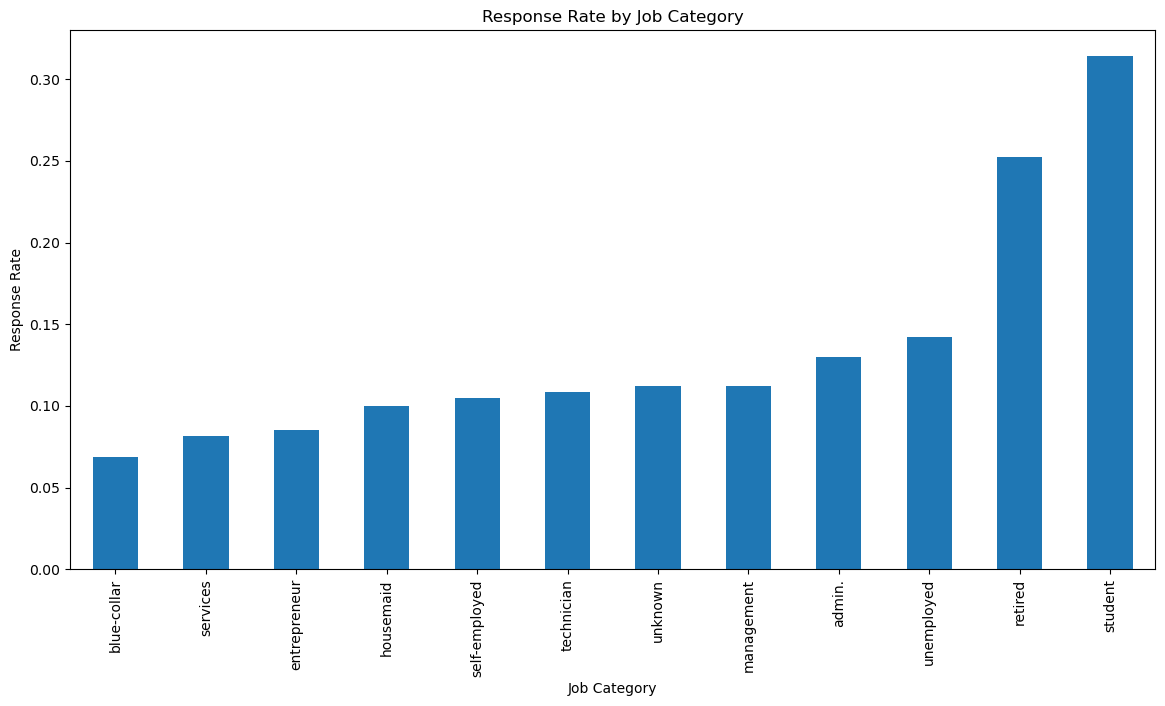

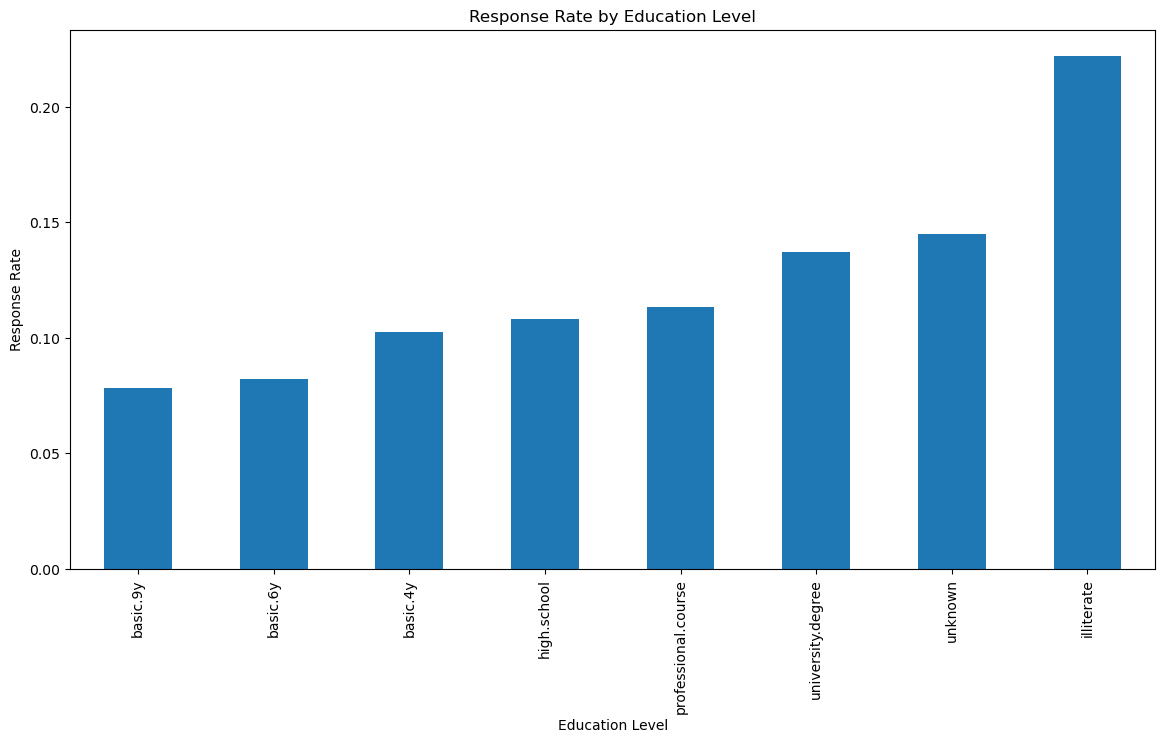

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Encode the target variable 'y' to numerical format
bank_data['y_encoded'] = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Calculate response rate for each job category
response_rate_by_job = bank_data.groupby('job')['y_encoded'].mean()

# Calculate response rate for each education level
response_rate_by_education = bank_data.groupby('education')['y_encoded'].mean()

# Plotting the response rate by job
plt.figure(figsize=(14, 7))
response_rate_by_job.sort_values().plot(kind='bar')
plt.title('Response Rate by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Response Rate')
plt.show()

# Plotting the response rate by education
plt.figure(figsize=(14, 7))
response_rate_by_education.sort_values().plot(kind='bar')
plt.title('Response Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Response Rate')
plt.show()


In [11]:
from scipy.stats import chi2_contingency

# Create a contingency table for job and response
contingency_table_job = pd.crosstab(bank_data['job'], bank_data['y'])

# Perform the Chi-Square test for the job category
chi2_stat_job, p_val_job, dof_job, ex_job = chi2_contingency(contingency_table_job)

# Create a contingency table for education and response
contingency_table_education = pd.crosstab(bank_data['education'], bank_data['y'])

# Perform the Chi-Square test for the education level
chi2_stat_education, p_val_education, dof_education, ex_education = chi2_contingency(contingency_table_education)

chi2_stat_job, p_val_job, chi2_stat_education, p_val_education


(961.2424403289555,
 4.189763287563623e-199,
 193.10590454149565,
 3.3051890144025054e-38)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# to understand which model gives us better performance 
# Initialize the models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC()
}

# Dictionary to hold cross-validation scores
cv_scores = {}

# Perform 5-fold cross-validation for each model and store the mean accuracy
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_scores[model_name] = scores.mean()

cv_scores


c:\Users\fateme\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\fateme\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

{'LogisticRegression': 0.9088619119878605,
 'RandomForestClassifier': 0.9120789074355085,
 'SVC': 0.898421851289833}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Create a dictionary of all values we want to test
param_grid = {
    'n_estimators': [100, 200, 300],  # Example: Test 100, 200, and 300 trees
    'max_depth': [10, 20, 30],        # Depths of 10, 20, and 30 to test
    'min_samples_split': [2, 4, 6],   # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples per leaf
}

# Use GridSearch to test all values
rf_grid = GridSearchCV(rf, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the model to our training data
rf_grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", rf_grid.best_params_)
print("Best Score:", rf_grid.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9145978755690439


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean of the cross-validation scores
mean_cv_score = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score)


Cross-validation scores: [0.91122914 0.91031866 0.91487102 0.9124431  0.91790592]
Mean cross-validation score: 0.9133535660091047


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with the best hyperparameters 
# For example: RandomForestClassifier(n_estimators=100, max_depth=20, ...)
rf = RandomForestClassifier(random_state=42)

# Train the model on the entire training set
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on the test set
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.9118718135469774
Precision: 0.6521106259097526
Recall: 0.47914438502673795
F1 Score: 0.5524044389642417
ROC-AUC: 0.9383212232025371


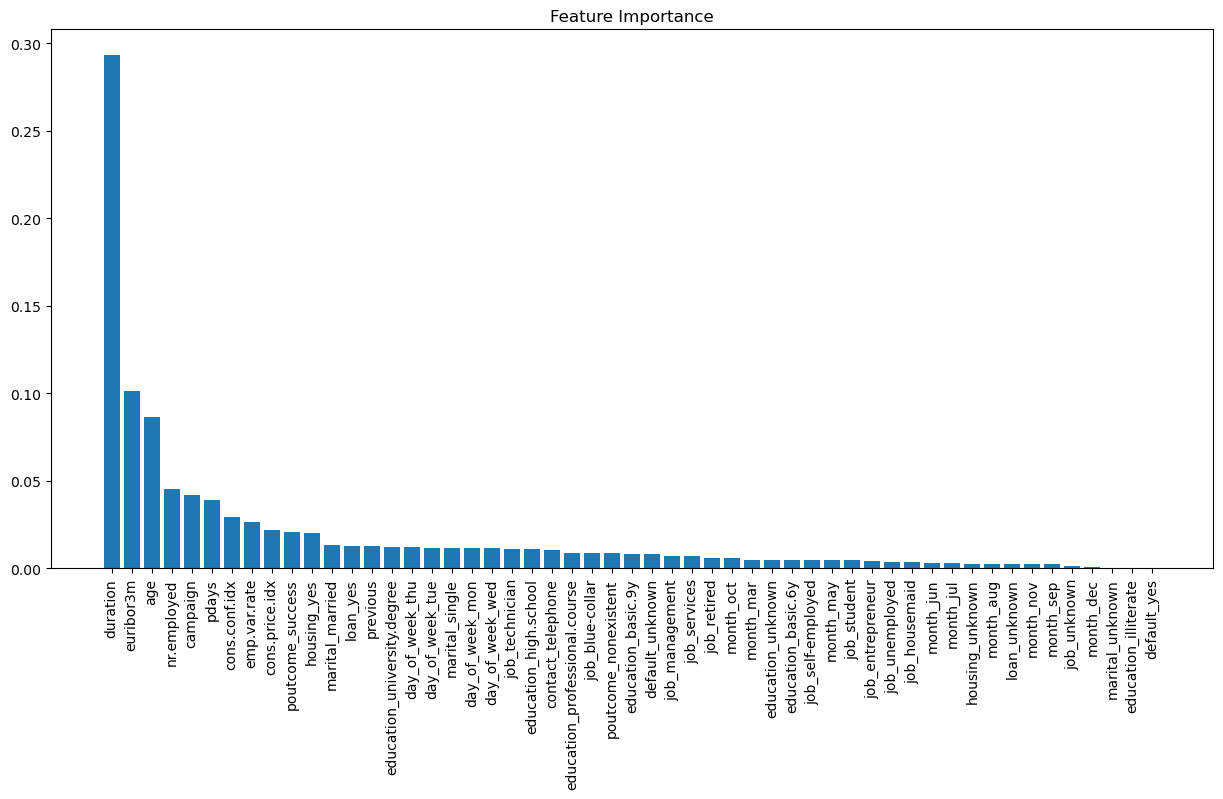

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Get feature importances
importances = rf.feature_importances_

# To match the feature importances with column names, we need to transform the column names 
# from the one-hot encoding process
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_features)
remaining_feature_names = bank_data.drop(categorical_features + ['y', 'y_encoded'], axis=1).columns
all_feature_names = np.concatenate((feature_names, remaining_feature_names))

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [all_feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(15, 7))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()


In [ ]:
# question 2
response_rate_by_contact = bank_data.groupby('contact')['y_encoded'].mean()


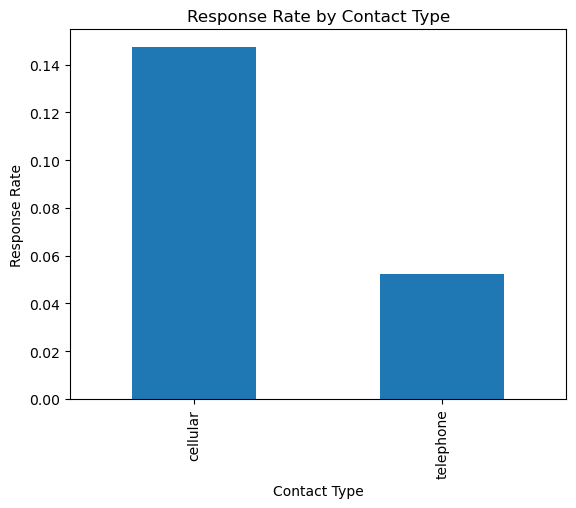

In [ ]:
import matplotlib.pyplot as plt
response_rate_by_contact.plot(kind='bar')
plt.title('Response Rate by Contact Type')
plt.xlabel('Contact Type')
plt.ylabel('Response Rate')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency
contingency_table_contact = pd.crosstab(bank_data['contact'], bank_data['y'])
chi2_stat_contact, p_val_contact, _, _ = chi2_contingency(contingency_table_contact)
print(f"Chi-Square Statistic: {chi2_stat_contact:.2f}")
print(f"P-value: {p_val_contact:.4f}")



Chi-Square Statistic: 862.32
P-value: 0.0000


In [ ]:
# question 3 
# Define age bins and labels for the segmentation
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Segment the data into age groups
bank_data['age_group'] = pd.cut(bank_data['age'], bins=age_bins, labels=age_labels, right=False)

# Perform the analysis for each age group
for age_group in age_labels:
    print(f"Age Group: {age_group}")
    contingency_table = pd.crosstab(bank_data[bank_data['age_group'] == age_group]['contact'], bank_data[bank_data['age_group'] == age_group]['y'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
    
    print(f"Chi-Square Statistic: {chi2_stat:.2f}")
    print(f"P-value: {p_val:.4f}\n")


Age Group: 18-29
Chi-Square Statistic: 197.77
P-value: 0.0000

Age Group: 30-39
Chi-Square Statistic: 258.87
P-value: 0.0000

Age Group: 40-49
Chi-Square Statistic: 123.93
P-value: 0.0000

Age Group: 50-59
Chi-Square Statistic: 125.92
P-value: 0.0000

Age Group: 60-69
Chi-Square Statistic: 36.07
P-value: 0.0000

Age Group: 70-79
Chi-Square Statistic: 6.40
P-value: 0.0114

Age Group: 80-89
Chi-Square Statistic: 1.98
P-value: 0.1596

Age Group: 90-99
Chi-Square Statistic: 0.00
P-value: 1.0000



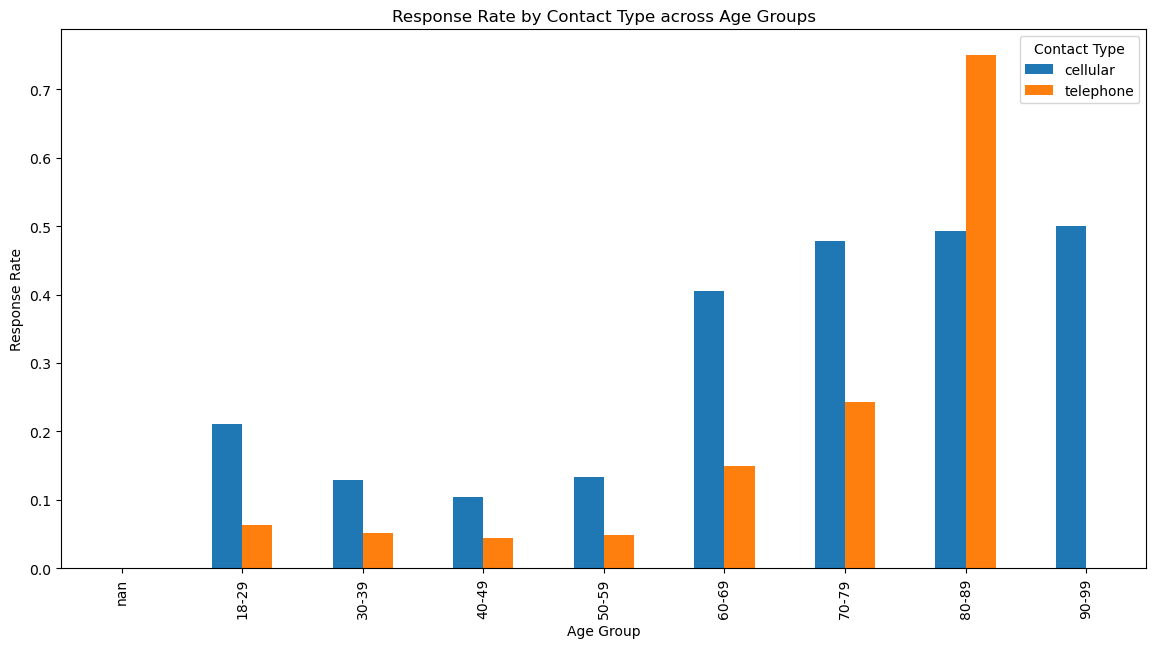

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to hold the response rates for each contact type within each age group
response_rates = []

# DataFrame and you have a column 'age_group' as well as 'contact' and 'y_encoded'
age_groups = bank_data['age_group'].unique()
contact_types = bank_data['contact'].unique()

for age_group in age_groups:
    for contact_type in contact_types:
        # Filter the DataFrame for the current age group and contact type
        subset = bank_data[(bank_data['age_group'] == age_group) & (bank_data['contact'] == contact_type)]
        
        # Calculate the response rate
        response_rate = subset['y_encoded'].mean()
        
        # Append the information to the list
        response_rates.append((age_group, contact_type, response_rate))

# Convert the list to a DataFrame
response_rates_df = pd.DataFrame(response_rates, columns=['Age Group', 'Contact Type', 'Response Rate'])

# Pivot the DataFrame to have age groups as rows, contact types as columns, and response rates as values

pivot_df = response_rates_df.pivot(index='Age Group', columns='Contact Type', values='Response Rate')


# Plot the bar chart
pivot_df.plot(kind='bar', figsize=(14, 7))

# Set the plot title and labels
plt.title('Response Rate by Contact Type across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Response Rate')

# Show the plot
plt.show()


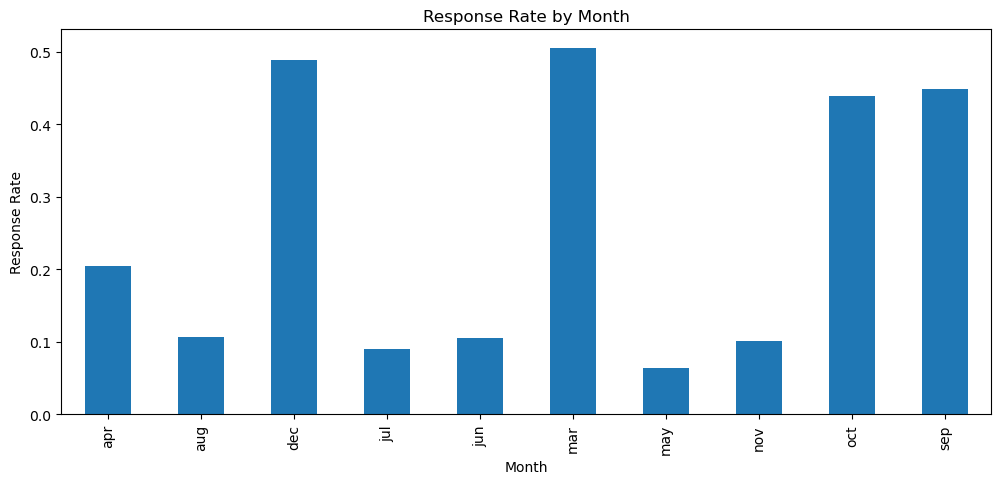

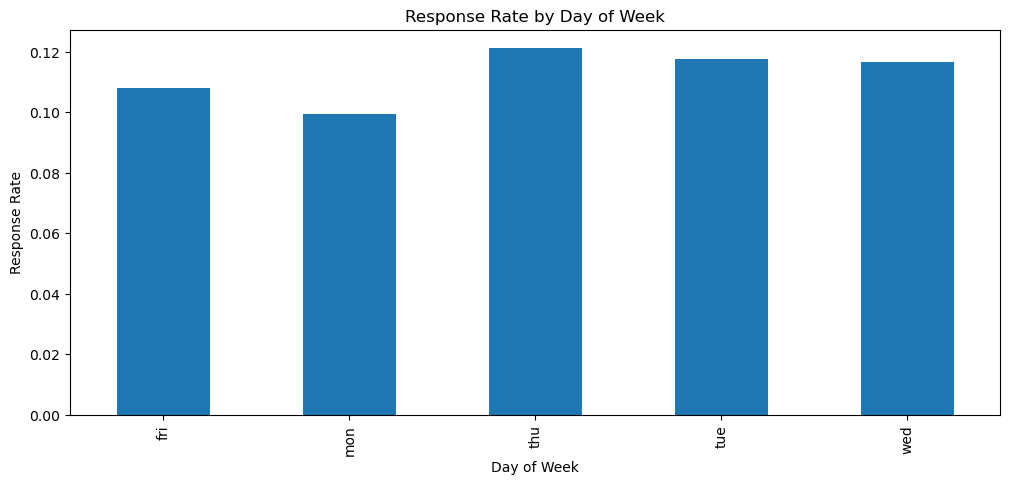

In [13]:
# Group by month and calculate mean response rate
response_rate_by_month = bank_data.groupby('month')['y_encoded'].mean()

# Group by day of the week and calculate mean response rate
response_rate_by_day = bank_data.groupby('day_of_week')['y_encoded'].mean()

# Plotting
plt.figure(figsize=(12, 5))
response_rate_by_month.plot(kind='bar')
plt.title('Response Rate by Month')
plt.xlabel('Month')
plt.ylabel('Response Rate')
plt.show()

plt.figure(figsize=(12, 5))
response_rate_by_day.plot(kind='bar')
plt.title('Response Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Response Rate')
plt.show()


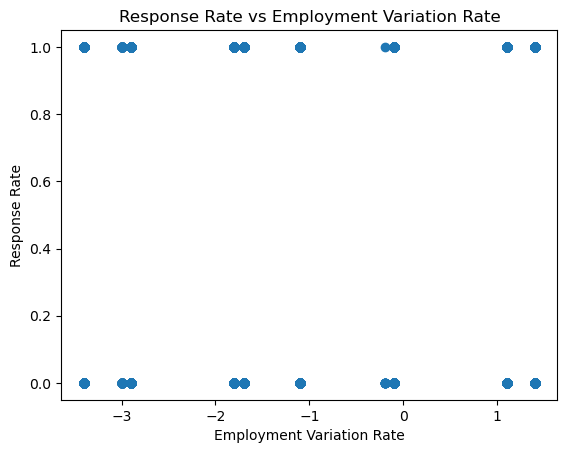

                y_encoded  emp.var.rate  cons.price.idx  euribor3m  \
y_encoded        1.000000     -0.298334       -0.136211  -0.307771   
emp.var.rate    -0.298334      1.000000        0.775334   0.972245   
cons.price.idx  -0.136211      0.775334        1.000000   0.688230   
euribor3m       -0.307771      0.972245        0.688230   1.000000   
nr.employed     -0.354678      0.906970        0.522034   0.945154   

                nr.employed  
y_encoded         -0.354678  
emp.var.rate       0.906970  
cons.price.idx     0.522034  
euribor3m          0.945154  
nr.employed        1.000000  
                            OLS Regression Results                            
Dep. Variable:              y_encoded   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     1593.
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time

In [14]:
# For scatter plot
plt.scatter(bank_data['emp.var.rate'], bank_data['y_encoded'])
plt.title('Response Rate vs Employment Variation Rate')
plt.xlabel('Employment Variation Rate')
plt.ylabel('Response Rate')
plt.show()

# For correlation
correlation_matrix = bank_data[['y_encoded', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']].corr()
print(correlation_matrix)

# For regression (requires statsmodels or scikit-learn)
import statsmodels.api as sm
X = bank_data[['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']] # add other economic indicators as needed
y = bank_data['y_encoded']
X = sm.add_constant(X) # adds a constant term to the predictor
est = sm.OLS(y, X).fit()
print(est.summary())
